# Task 1: Data preparation and customer analytics

In [4]:
# Loading required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Turn off warnings
import warnings
warnings.filterwarnings('ignore')

---

## I. Ask
#### Business Tasks

- LIFESTAGE: Customer attribute analysis to identify whether a customer has a family or not and what point in life they are at 

- PREMIUM_CUSTOMER: Customer segmentation analysis to identify whether customers may spend more for quality or brand or whether they will purchase the cheapest options

---

## II. Prepare

I utilize 2 files to analyze, including: 'QVI_purchase_behaviour.csv' and 'QVI_transaction_data.xlsx'

In [5]:
trans_data = pd.read_excel("QVI_transaction_data.xlsx")
customer_data = pd.read_csv("QVI_purchase_behaviour.csv")

---
## III. Process
### 1. Overview of data frame

In [6]:
# View summary of data frame
trans_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [7]:
# Overview of data frame
trans_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


**Observation:**
- No any NULL in this data frame

- Data type of DATE field is integer fomart, so I need to change it to datetime format

### 2. Data Exploration

#### a) Eliminate duplicated records

In [8]:
# Identify duplicate values in dataframe drop_na_data
trans_data[trans_data.duplicated()].head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
124845,43374,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0


In [9]:
# Eliminate duplicate values
trans_data = trans_data.drop_duplicates()

# Recheck
trans_data[trans_data.duplicated()].head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES


#### b) Data summary 

In [10]:
trans_data.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264835.000000,264835.000000,2.648350e+05,2.648350e+05,264835.000000,264835.000000,264835.000000
mean,43464.036600,135.080216,1.355496e+05,1.351584e+05,56.583201,1.907308,7.304205
std,105.389336,76.784306,8.058011e+04,7.813316e+04,32.826692,0.643655,3.083231
min,43282.000000,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.000000,7.002100e+04,6.760100e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.000000,1.303580e+05,1.351380e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.000000,2.030945e+05,2.027015e+05,85.000000,2.000000,9.200000
max,43646.000000,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


The maximum value in 2 fields "PROD_QTY" and "TOT_SALES" is *much larger than* the mean value, so I'm going to check it to see if there are outliers

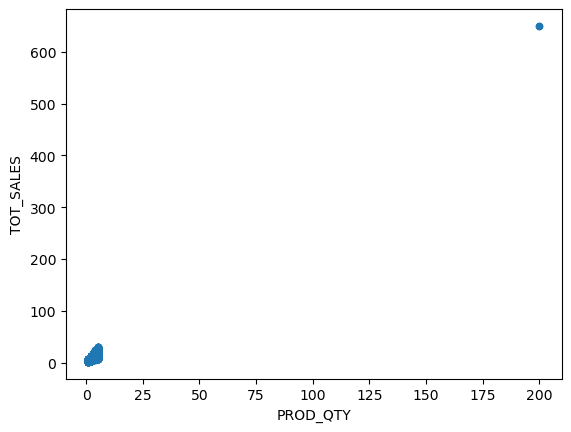

In [11]:
# Plot a scatter plot with 2 fields "PROD_QTY" and "TOT_SALES"
trans_data.plot(kind = 'scatter', x = 'PROD_QTY', y = 'TOT_SALES')
plt.show()

There are an outliers, it is much larger than the mean value, so it should be eliminated

In [12]:
# Find the outlier
trans_data.sort_values(by = 'TOT_SALES', ascending = False).head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,43331,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,43605,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0
171815,43329,24,24095,20797,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5
150683,43605,118,118021,120799,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5
55558,43599,190,190113,190914,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5


**Obversation:**

- There are two transactions where 200 products are bought in one transaction and both of these transactions were by the same customer

- This is not a normal customer, so I have eliminated these transactions from further analysis

In [13]:
# Eliminate them
trans_data = trans_data[trans_data['LYLTY_CARD_NBR'] != 226000]

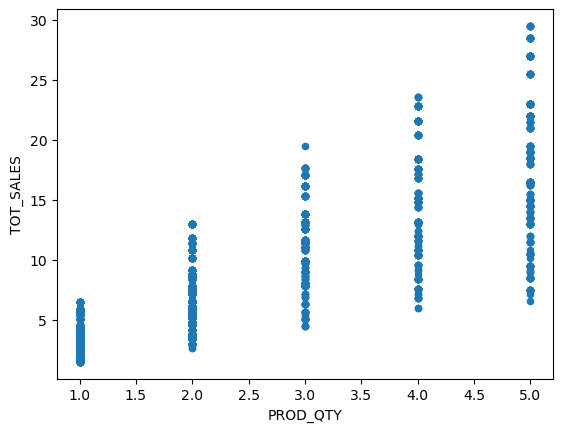

In [14]:
# Recheck the scatter plot
trans_data.plot(kind = 'scatter', x = 'PROD_QTY', y = 'TOT_SALES')
plt.show()

In [15]:
# Recheck the summary
trans_data.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264833.000000,264833.000000,2.648330e+05,2.648330e+05,264833.000000,264833.000000,264833.000000
mean,43464.036570,135.079529,1.355489e+05,1.351577e+05,56.583598,1.905812,7.299351
std,105.389061,76.784189,8.058003e+04,7.813305e+04,32.826498,0.343437,2.527244
min,43282.000000,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.000000,7.002100e+04,6.760000e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.000000,1.303570e+05,1.351370e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.000000,2.030940e+05,2.027000e+05,85.000000,2.000000,9.200000
max,43646.000000,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000


The summary now seems reasonable

#### c) Date field format

We can see that the date is in an integer format. Change to YYYY/MM/DD format.

In [16]:
# Change DATE field with INT data type into DATETIME with DD/MM/YYYY format
trans_data['Date'] =  pd.to_datetime(trans_data['DATE'], origin='1899-12-30', unit='D')
trans_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Date
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018-10-17
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2019-05-14
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,2019-05-20
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,2018-08-17
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,2018-08-18


#### d) Removing irrelevant values

In [17]:
# Generate a summary of the PROD_NAME column
trans_data["PROD_NAME"].describe()

count                                     264833
unique                                       114
top       Kettle Mozzarella   Basil & Pesto 175g
freq                                        3304
Name: PROD_NAME, dtype: object

In [18]:
# Split product names as well as remove all digits and special characters such as '&'
import re
PROD_word_only = trans_data["PROD_NAME"].str.replace('([0-9]+[gG])','').str.replace('[^\w]', ' ').str.split()

# Calculate the frequency grouped by words and sort them
PROD_freq = pd.value_counts([word for name in PROD_word_only
                                for word in name]).sort_values(ascending=False)  
PROD_freq.head()

Chips     49770
Kettle    41288
Smiths    28859
Salt      27976
Cheese    27890
dtype: int64

There are salsa products in the dataset but we are only interested in the chips category, so let's remove these.

In [19]:
# Remove salsa
trans_data = trans_data[~trans_data["PROD_NAME"].str.contains("[Ss]alsa")]

---

## IV. Analysis and Visualization

### 1. Data analysis on Transaction data frame

#### a) Transaction count analysis by Date

In [20]:
# Count the number of transactions by date
trans_by_date = trans_data.groupby(["Date"]).size().rename("Transaction")
trans_by_date = trans_by_date.reset_index()
trans_by_date

,Date,Transaction
0,2018-07-01,663
1,2018-07-02,650
2,2018-07-03,674
3,2018-07-04,669
4,2018-07-05,660
...,...,...
359,2019-06-26,657
360,2019-06-27,669
361,2019-06-28,673
362,2019-06-29,703


In [21]:
# Create a summary of transaction count by date
trans_by_date.describe()

,Transaction
count,364.000000
mean,677.854396
std,33.688873
min,607.000000
25%,658.000000
50%,674.000000
75%,694.250000
max,865.000000


There are only 364 rows, which means only 364 days. Thus, the data frame was missing by 1 day

In [22]:
# Create a time series starting from 2018-07-01 to 2019-06-30
date_range = pd.date_range(start = '2018-07-01', end = '2019-06-30')

# Convert Date field to datetime object
trans_by_date["Date"] = pd.to_datetime(trans_by_date['Date'])

# Find values in a time series that do not appear in the Date field
missing_date = date_range[~date_range.isin(trans_by_date['Date'])]

# Show it
missing_date

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq='D')

The missing day is '2018-12-25'. That is a Christmas day

In [23]:
# Check for dates not in DataFrame and add NaN value to DataFrame
missing_date = list(set(date_range) - set(trans_by_date['Date']))
for date in missing_date:
    trans_by_date = trans_by_date.append({'Date': date, 'Transaction': np.nan}, ignore_index = True)
    
# Reorder DataFrame by 'Date' field
trans_by_date = trans_by_date.sort_values(by = 'Date')

# Display '2018-12-25' values in "Date" field
trans_by_date[trans_by_date['Date'] == '2018-12-25']

,Date,Transaction
364,2018-12-25,NaT


In [24]:
trans_by_date[(trans_by_date['Date'] >= '2018-12-20') & (trans_by_date['Date'] <= '2018-12-30')]

,Date,Transaction
172,2018-12-20,808
173,2018-12-21,781
174,2018-12-22,840
175,2018-12-23,853
176,2018-12-24,865
364,2018-12-25,NaT
177,2018-12-26,700
178,2018-12-27,690
179,2018-12-28,669
180,2018-12-29,666


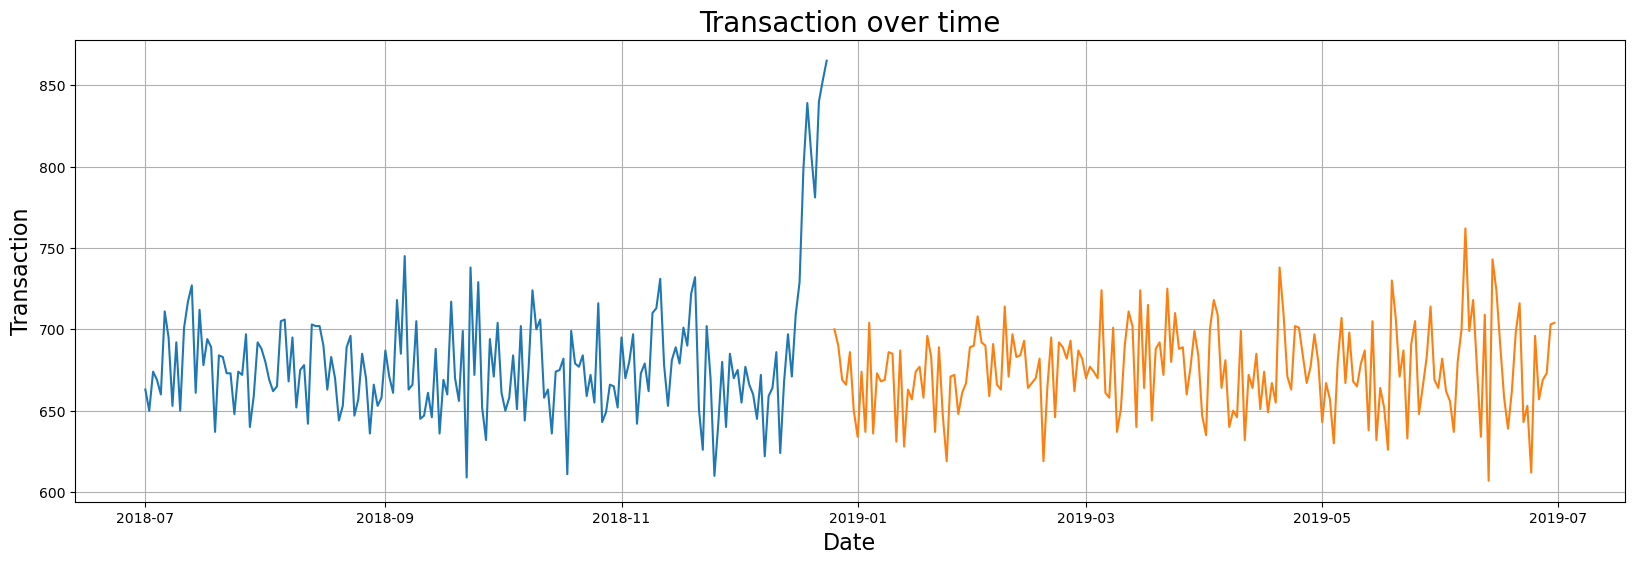

In [25]:
# Create a chart of number of transactions over time 
plt.figure(figsize=(20, 6))

df_part1 = trans_by_date[trans_by_date['Date'] <= '2018-12-24']
df_part2 = trans_by_date[trans_by_date['Date'] >= '2018-12-26']

# Line chart 1
plt.plot(df_part1['Date'], df_part1['Transaction'], linestyle='-')

# Line chart 2
plt.plot(df_part2['Date'], df_part2['Transaction'], linestyle='-')

plt.xlabel('Date', fontsize = 16)
plt.ylabel('Transaction', fontsize = 16)
plt.title('Transaction over time', fontsize = 20)
plt.grid(True)

plt.show()

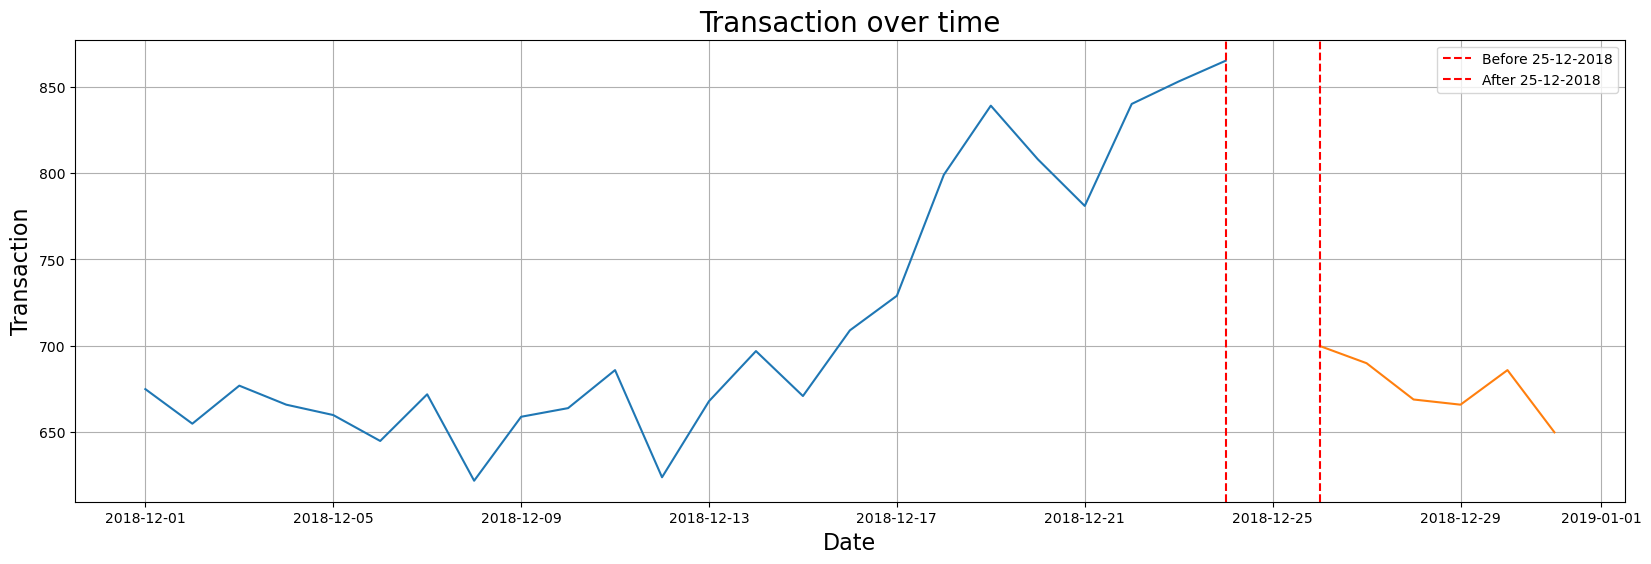

In [26]:
# Create a chart of the number of transactions over time in December
plt.figure(figsize=(20, 6))

df_part1 = trans_by_date[(trans_by_date['Date'] >= '2018-12-01') & (trans_by_date['Date'] <= '2018-12-24')]
df_part2 = trans_by_date[(trans_by_date['Date'] >= '2018-12-26') & (trans_by_date['Date'] <= '2018-12-31')]

# Line chart 1
plt.plot(df_part1['Date'], df_part1['Transaction'], linestyle='-')

# Line chart 2
plt.plot(df_part2['Date'], df_part2['Transaction'], linestyle='-')

# Add dashed lines before and after 25-12-2018
plt.axvline(pd.to_datetime('2018-12-24'), color='red', linestyle='--', label = 'Before 25-12-2018')
plt.axvline(pd.to_datetime('2018-12-26'), color='red', linestyle='--', label = 'After 25-12-2018')
plt.legend()

plt.xlabel('Date', fontsize=16)
plt.ylabel('Transaction', fontsize=16)
plt.title('Transaction over time', fontsize=20)
plt.grid(True)

plt.show()

There is an increase in purchases in December and a break in late December, where on the 25th (Christmas day), store sales were zero. This is due to shops being closed on Christmas day. Thus, I will not treat this point as an outlier

---

#### b) Pack size analysis

In [27]:
# Taking the digits that are in PROD_NAME field
trans_data["PACK_SIZE"] = trans_data["PROD_NAME"].str.extract("([0-9]+)").astype("int64")
trans_data["PACK_SIZE"].head()

0    175
1    175
2    170
3    175
4    150
Name: PACK_SIZE, dtype: int64

In [28]:
# Create a summary of PACK_SIZE field
trans_data["PACK_SIZE"].describe()

count    246739.000000
mean        175.583523
std          59.432239
min          70.000000
25%         150.000000
50%         170.000000
75%         175.000000
max         380.000000
Name: PACK_SIZE, dtype: float64

The largest size is 380g and the smallest size is 70g - seems sensible!

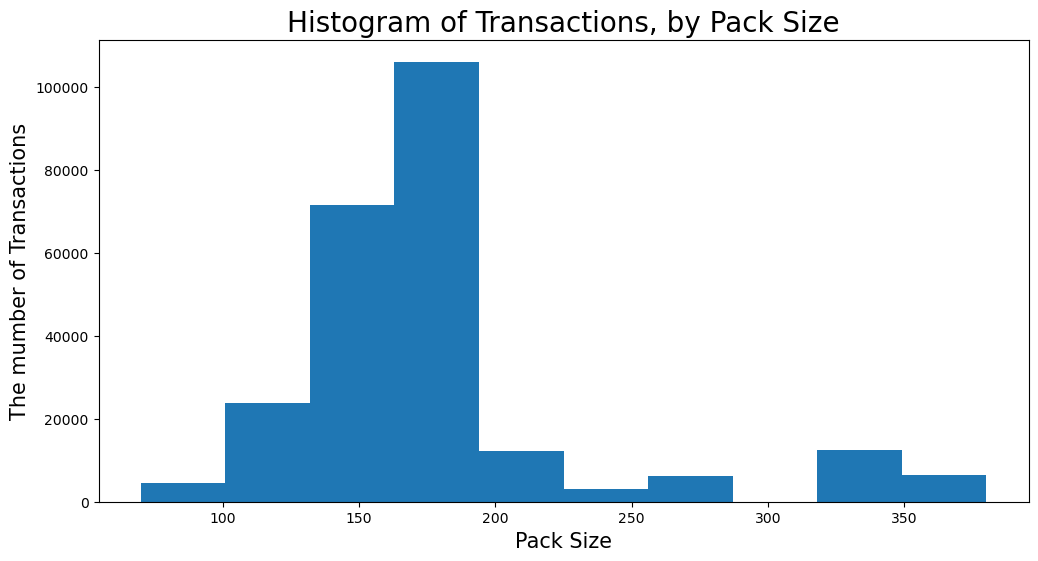

In [29]:
# Plot a histogram showing the number of transactions by pack size
trans_data["PACK_SIZE"].plot(kind = "hist", figsize=(12,6))
plt.title("Histogram of Transactions, by Pack Size",fontsize=20)
plt.xlabel("Pack Size",fontsize=15)
plt.ylabel("The mumber of Transactions",fontsize=15)
plt.show()

Histogram plot created look reasonable. Distribution value centered around 150g to 200g

---

#### c) Brand analysis

In [30]:
# I use the first word in PROD_NAME to work out the brand 
trans_data["BRAND"] = trans_data["PROD_NAME"].str.split().str[0]
trans_data["BRAND"].head()

0    Natural
1        CCs
2     Smiths
3     Smiths
4     Kettle
Name: BRAND, dtype: object

In [31]:
# Check brand name
sorted(trans_data["BRAND"].unique())

['Burger',
 'CCs',
 'Cheetos',
 'Cheezels',
 'Cobs',
 'Dorito',
 'Doritos',
 'French',
 'Grain',
 'GrnWves',
 'Infuzions',
 'Infzns',
 'Kettle',
 'NCC',
 'Natural',
 'Pringles',
 'RRD',
 'Red',
 'Smith',
 'Smiths',
 'Snbts',
 'Sunbites',
 'Thins',
 'Tostitos',
 'Twisties',
 'Tyrrells',
 'WW',
 'Woolworths']

Some of the brand names look like they are of the same brands

- Dorito and Doritos
- Grain and GrnWves (Not sure)
- Infuzions and Infzns
- NCC and Natural (Not sure)
- RRD and Red (Not sure)
- Smith andd Smiths 
- Snbts and Sunbites
- WW and Woolworths

**Check brands which are not sure**

In [32]:
# Grain and GrnWves
trans_data["PROD_NAME"].loc[trans_data["BRAND"]=="Grain"].head()

7      Grain Waves         Sweet Chilli 210g
9      Grain Waves Sour    Cream&Chives 210G
85     Grain Waves         Sweet Chilli 210g
181    Grain Waves         Sweet Chilli 210g
225    Grain Waves         Sweet Chilli 210g
Name: PROD_NAME, dtype: object

GrnWves stands for Grain Waves

In [33]:
# NCC and Natural
trans_data["PROD_NAME"].loc[trans_data["BRAND"]=="Natural"].head()

0       Natural Chip        Compny SeaSalt175g
40      Natural ChipCo      Hony Soy Chckn175g
75     Natural Chip Co     Tmato Hrb&Spce 175g
214    Natural Chip Co     Tmato Hrb&Spce 175g
234     Natural ChipCo      Hony Soy Chckn175g
Name: PROD_NAME, dtype: object

NCC stands for Natural Chip Company

In [34]:
# RRD and Red
trans_data["PROD_NAME"].loc[trans_data["BRAND"]=="Red"].head()

28        Red Rock Deli Thai  Chilli&Lime 150g
34     Red Rock Deli Sp    Salt & Truffle 150G
212    Red Rock Deli Sp    Salt & Truffle 150G
297       Red Rock Deli Thai  Chilli&Lime 150g
331    Red Rock Deli Sp    Salt & Truffle 150G
Name: PROD_NAME, dtype: object

RRD stands for Red Rock Deli

In [35]:
# Clean brand names
def rename_brand(new,old):
    trans_data["BRAND"].loc[trans_data["BRAND"] == old] = new

rename_brand("Doritos","Dorito")
rename_brand("Grain Waves","Grain")
rename_brand("Grain Waves","GrnWves")
rename_brand("Infuzions","Infzns")
rename_brand("Natural Chip Co","NCC")
rename_brand("Natural Chip Co","Natural")
rename_brand("Red Rock Deli","Red")
rename_brand("Red Rock Deli","RRD")
rename_brand("Smiths","Smith")
rename_brand("Sunbites","Snbts")
rename_brand("Woolworths","WW")

# Check results
sorted(trans_data["BRAND"].unique())

['Burger',
 'CCs',
 'Cheetos',
 'Cheezels',
 'Cobs',
 'Doritos',
 'French',
 'Grain Waves',
 'Infuzions',
 'Kettle',
 'Natural Chip Co',
 'Pringles',
 'Red Rock Deli',
 'Smiths',
 'Sunbites',
 'Thins',
 'Tostitos',
 'Twisties',
 'Tyrrells',
 'Woolworths']

**The results look reasonable**

In [36]:
# Plot a barchart to show the total sales of each brand
trans_by_brands = trans_data.groupby(trans_data["BRAND"]).size().rename("Transaction")
trans_by_brands = trans_by_brands.sort_values(ascending = True)
trans_by_brands.head()

BRAND
French      1418
Burger      1564
Cheetos     2927
Sunbites    3008
CCs         4551
Name: Transaction, dtype: int64

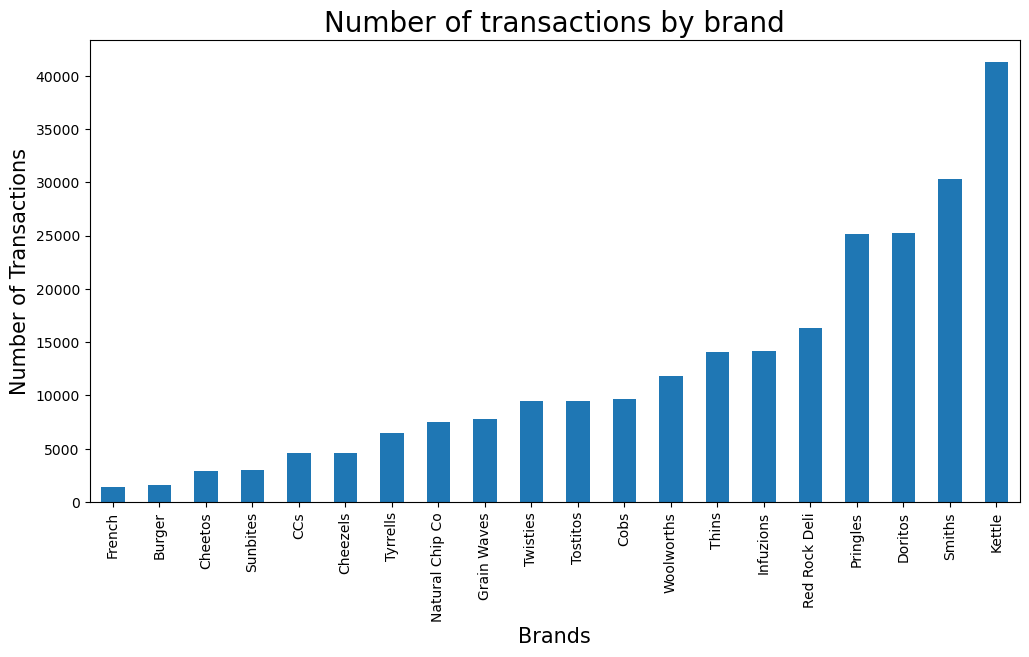

In [37]:
trans_by_brands.plot(kind = "bar", figsize=(12,6))
plt.title("Number of transactions by brand",fontsize=20)
plt.xlabel("Brands",fontsize=15)
plt.ylabel("Number of Transactions",fontsize=15)
plt.show()

The Kettle brand has the largest number of transactions

---

### 2.  Data analysis on customer data frame 

In [38]:
# Display data
customer_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [39]:
# Data infomation
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [40]:
# Summary numerical variable LYLTY_CARD_NBR
customer_data.describe()

,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


The summary seems reasonable !

#### a) Lifestage analysis

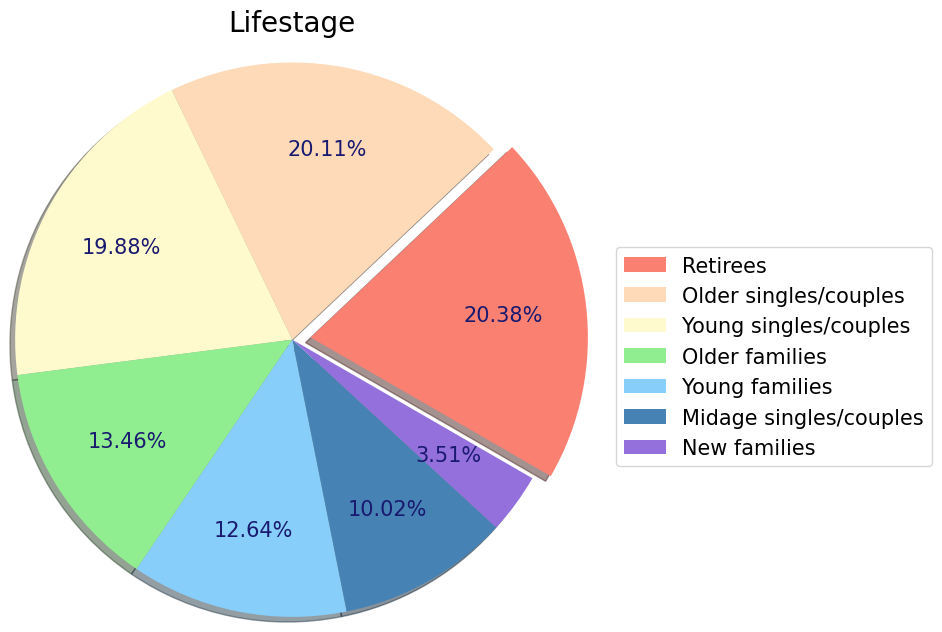

In [41]:
# Plot a pie chart of LIFESTAGE
plt.figure(figsize=(6,6))
colors = ['salmon', 'peachpuff', 'lemonchiffon', 'lightgreen', 'lightskyblue','steelblue','mediumpurple']
plt.pie(customer_data["LIFESTAGE"].value_counts(), colors=colors, shadow=True, explode=(0.1,0,0,0,0,0,0),
                                              textprops= {'fontsize':15,'color':'midnightblue'},
                                              radius=1.5, autopct='%.2f%%', pctdistance=0.7, startangle=-30)
plt.legend(customer_data["LIFESTAGE"].value_counts().index.str.capitalize(), fontsize=15,
                                                                        loc=2, 
                                                                        bbox_to_anchor=(1.2,0.7),borderaxespad = 0.)
plt.title("Lifestage", y=1.15, fontsize=20)
plt.show()

#### b) Customer type analysis

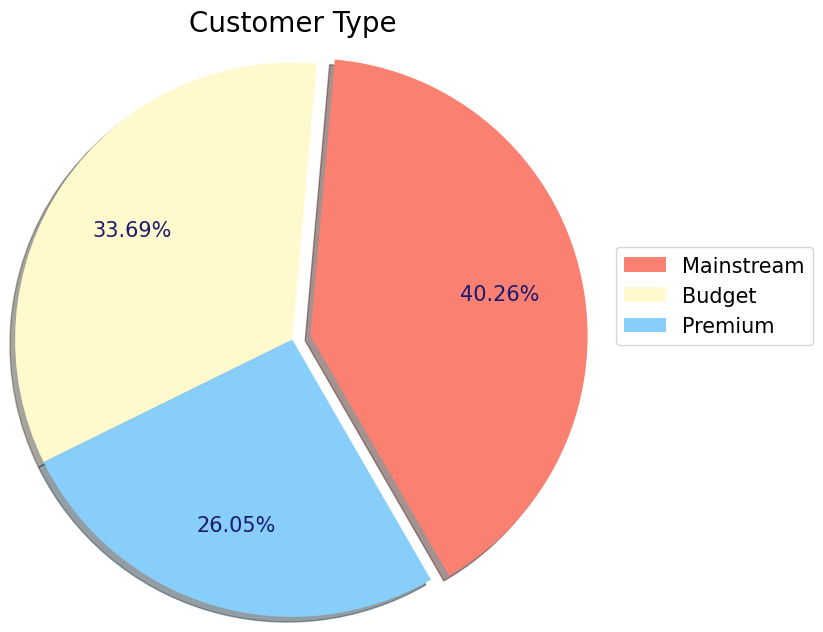

In [42]:
# Plot a pie chart of PREMIUM_CUSTOMER
plt.figure(figsize=(6,6))
colors = ['salmon', 'lemonchiffon', 'lightskyblue']
plt.pie(customer_data["PREMIUM_CUSTOMER"].value_counts(), colors=colors, shadow=True, explode=(0.1,0,0),
                                                     textprops= {'fontsize':15,'color':'midnightblue'},
                                                     radius=1.5, autopct='%.2f%%', pctdistance=0.7, startangle=-60)
plt.legend(customer_data["PREMIUM_CUSTOMER"].value_counts().index, fontsize=15,
                                                       loc=2, bbox_to_anchor=(1.2,0.7),borderaxespad = 0.)
plt.title("Customer Type", y=1.15, fontsize=20)
plt.show()

**Obversation:**

- There are 72637 customer sample in this data frame

- For the LifeStage chart, *retirees* account for the largest share - *20.38%*, while *new families* account for only *3.81%*

- For the Customer Type chart, *Mainstream customers* account for the largest proportion，followed by *Budget customers*, and finally by *Premium customers*

---

### 3. Merge Dataset

In [43]:
# Merge transaction data to customer data
merge_data = pd.merge(trans_data, customer_data, on ="LYLTY_CARD_NBR")
merge_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Date,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018-10-17,175,Natural Chip Co,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2019-05-14,175,CCs,MIDAGE SINGLES/COUPLES,Budget
2,43414,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,2018-11-10,160,Woolworths,MIDAGE SINGLES/COUPLES,Budget
3,43533,1,1307,347,54,CCs Original 175g,1,2.1,2019-03-09,175,CCs,MIDAGE SINGLES/COUPLES,Budget
4,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,2019-05-20,170,Smiths,MIDAGE SINGLES/COUPLES,Budget


In [44]:
merge_data.count()

DATE                246739
STORE_NBR           246739
LYLTY_CARD_NBR      246739
TXN_ID              246739
PROD_NBR            246739
PROD_NAME           246739
PROD_QTY            246739
TOT_SALES           246739
Date                246739
PACK_SIZE           246739
BRAND               246739
LIFESTAGE           246739
PREMIUM_CUSTOMER    246739
dtype: int64

In [45]:
# Check if some customers were not matched on by checking for nulls
merge_data.isna().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
Date                0
PACK_SIZE           0
BRAND               0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

There are no nulls! So all our customers in the transaction data has been accounted for in the customer dataset

In [46]:
# save as csv
merge_data.to_csv("merge_data.csv")

---

### 4. Data analysis on customer segments

Now that the data is ready for analysis, I can define some metrics of interest to the client:
- Who spends the most on chips (total sales), describing customers by Lifestage and how premium their general purchasing behaviour is
- How many customers are in each segment
- How many chips are bought per customer by segment
- What's the average chip price by customer segment
- The customer's total spend over the period and total spend for each transaction to understand what proportion of their grocery spend is on chips 
- Proportion of customers in each customer segment overall to compare against the mix of customers who purchase chips

#### a) Total sales by LIFESTAGE and PREMIUM_CUSTOMER

In [49]:
total_sales = pd.DataFrame(merge_data.groupby(["LIFESTAGE","PREMIUM_CUSTOMER"])["TOT_SALES"].sum())
total_sales

TOT_SALES
LIFESTAGE              PREMIUM_CUSTOMER           
MIDAGE SINGLES/COUPLES Budget             33345.70
                       Mainstream         84734.25
                       Premium            54443.85
NEW FAMILIES           Budget             20607.45
                       Mainstream         15979.70
                       Premium            10760.80
OLDER FAMILIES         Budget            156863.75
                       Mainstream         96413.55
                       Premium            75242.60
OLDER SINGLES/COUPLES  Budget            127833.60
                       Mainstream        124648.50
                       Premium           123531.55
RETIREES               Budget            105916.30
                       Mainstream        145168.95
                       Premium            91296.65
YOUNG FAMILIES         Budget            129717.95
                       Mainstream         86338.25
                       Premium            78571.70
YOUNG SINGLES/COUPLES  Budget             57122.10
                       Mainstream        147582.20
                       Premium            39052.30

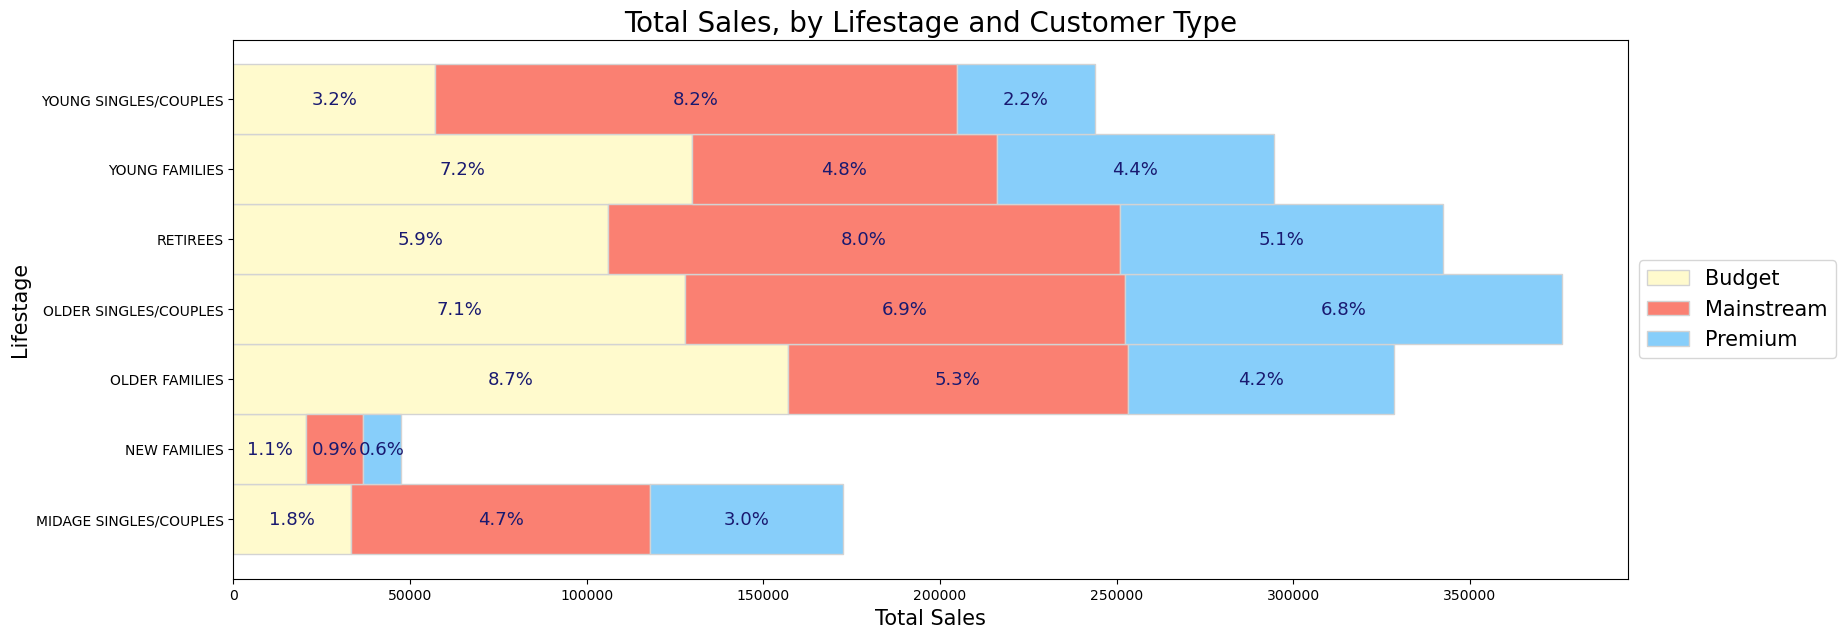

In [53]:
# Plot to show total sales in each customer segement
# Values of each group
bars1 = total_sales[total_sales.index.get_level_values("PREMIUM_CUSTOMER") == "Budget"]["TOT_SALES"]
bars2 = total_sales[total_sales.index.get_level_values("PREMIUM_CUSTOMER") == "Mainstream"]["TOT_SALES"]
bars3 = total_sales[total_sales.index.get_level_values("PREMIUM_CUSTOMER") == "Premium"]["TOT_SALES"]
 
bars1_text = (bars1 / sum(total_sales["TOT_SALES"])).apply("{:.1%}".format)
bars2_text = (bars2 / sum(total_sales["TOT_SALES"])).apply("{:.1%}".format)
bars3_text = (bars3 / sum(total_sales["TOT_SALES"])).apply("{:.1%}".format)
 
# Names of group and bar width
names = total_sales.index.get_level_values("LIFESTAGE").unique()

# The position of the bars on the x-axis
r = np.arange(len(names))

plt.figure(figsize=(18,7)) 

colors = ['salmon', 'lemonchiffon', 'lightskyblue']
# Create yellow bars
budget_bar = plt.barh(r, bars1, color=colors[1], edgecolor="lightgrey", height=1, label="Budget")
# Create red bars (middle)
mains_bar = plt.barh(r, bars2, left=bars1, color=colors[0], edgecolor="lightgrey", height=1, label="Mainstream")
# Create blue bars (top)
prem_bar = plt.barh(r, bars3, left=bars1.append(bars2).groupby(["LIFESTAGE"]).sum(), color=colors[2], edgecolor="lightgrey", height=1, label="Premium")
    
for i in range(7):
    budget_width = budget_bar[i].get_width()
    budget_main_width = budget_width + mains_bar[i].get_width()
    plt.text(budget_width/2, i, bars1_text[i], va='center', ha='center', size=13, color='midnightblue')
    plt.text(budget_width + mains_bar[i].get_width()/2, i, bars2_text[i], va='center', ha='center', size=13, color='midnightblue')
    plt.text(budget_main_width + prem_bar[i].get_width()/2, i, bars3_text[i], va='center', ha='center', size=13, color='midnightblue')
    
# Custom X axis
plt.yticks(r, names)
plt.ylabel("Lifestage",fontsize=15)
plt.xlabel("Total Sales",fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),fontsize=15)

plt.title("Total Sales, by Lifestage and Customer Type",fontsize=20)

# Show graphic
plt.show()

Sales are coming mainly from:

- Budget - older families

- Mainstream - young singles/couples

- Mainstream - retirees

#### b) Number of customers by LIFESTAGE and PREMIUM_CUSTOMER

In [63]:
customer_count = pd.DataFrame(customer_data.groupby(["LIFESTAGE","PREMIUM_CUSTOMER"]).size().rename("Count"))
customer_count

Count
LIFESTAGE              PREMIUM_CUSTOMER       
MIDAGE SINGLES/COUPLES Budget             1504
                       Mainstream         3340
                       Premium            2431
NEW FAMILIES           Budget             1112
                       Mainstream          849
                       Premium             588
OLDER FAMILIES         Budget             4675
                       Mainstream         2831
                       Premium            2274
OLDER SINGLES/COUPLES  Budget             4929
                       Mainstream         4930
                       Premium            4750
RETIREES               Budget             4454
                       Mainstream         6479
                       Premium            3872
YOUNG FAMILIES         Budget             4017
                       Mainstream         2728
                       Premium            2433
YOUNG SINGLES/COUPLES  Budget             3779
                       Mainstream         8088
                       Premium            2574

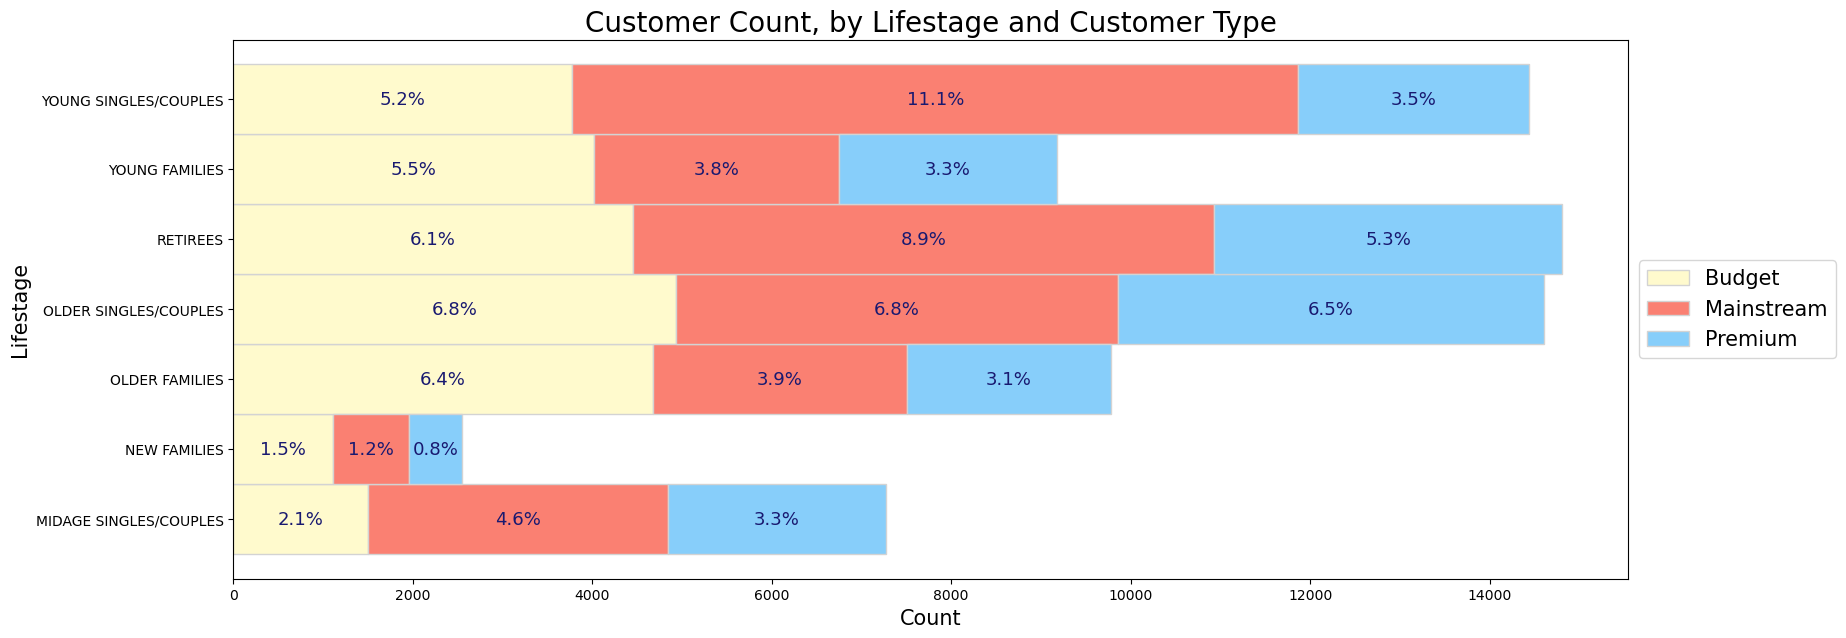

In [66]:
# Plot to show the number of customers by LIFESTAGE and PREMIUM_CUSTOMER
# Values of each group
bars1 = customer_count[customer_count.index.get_level_values("PREMIUM_CUSTOMER") == "Budget"]["Count"]
bars2 = customer_count[customer_count.index.get_level_values("PREMIUM_CUSTOMER") == "Mainstream"]["Count"]
bars3 = customer_count[customer_count.index.get_level_values("PREMIUM_CUSTOMER") == "Premium"]["Count"]
 
bars1_text = (bars1 / sum(customer_count["Count"])).apply("{:.1%}".format)
bars2_text = (bars2 / sum(customer_count["Count"])).apply("{:.1%}".format)
bars3_text = (bars3 / sum(customer_count["Count"])).apply("{:.1%}".format)
 
# Names of group and bar width
names = customer_count.index.get_level_values("LIFESTAGE").unique()

# The position of the bars on the x-axis
r = np.arange(len(names))

plt.figure(figsize=(18,7)) 

colors = ['salmon', 'lemonchiffon', 'lightskyblue']
# Create yellow bars
budget_bar = plt.barh(r, bars1, color=colors[1], edgecolor="lightgrey", height=1, label="Budget")
# Create red bars (middle)
mains_bar = plt.barh(r, bars2, left=bars1, color=colors[0], edgecolor="lightgrey", height=1, label="Mainstream")
# Create blue bars (top)
prem_bar = plt.barh(r, bars3, left=bars1.append(bars2).groupby(["LIFESTAGE"]).sum(), color=colors[2], edgecolor="lightgrey", height=1, label="Premium")
    
for i in range(7):
    budget_width = budget_bar[i].get_width()
    budget_main_width = budget_width + mains_bar[i].get_width()
    plt.text(budget_width/2, i, bars1_text[i], va='center', ha='center', size=13, color='midnightblue')
    plt.text(budget_width + mains_bar[i].get_width()/2, i, bars2_text[i], va='center', ha='center', size=13, color='midnightblue')
    plt.text(budget_main_width + prem_bar[i].get_width()/2, i, bars3_text[i], va='center', ha='center', size=13, color='midnightblue')
    
# Custom X axis
plt.yticks(r, names)
plt.ylabel("Lifestage",fontsize=15)
plt.xlabel("Count",fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),fontsize=15)

plt.title("Customer Count, by Lifestage and Customer Type",fontsize=20)

# Show graphic
plt.show()


There are more Mainstream - young singles/couples and Mainstream - retirees who buy chips. This contributes to there being more sales to these customer segments but this is not a major driver for the Budget - Older families segment.

#### c) Average number of units per customer by LIFESTAGE and PREMIUM_CUSTOMER

In [65]:
# Calculate average number of units per customer by LIFESTAGE and PREMIUM_CUSTOMER
avg_prod = pd.merge(total_sales,customer_count,on=["LIFESTAGE","PREMIUM_CUSTOMER"])
avg_prod['Prod_Qty'] = merge_data.groupby(["LIFESTAGE","PREMIUM_CUSTOMER"])["PROD_QTY"].sum()
avg_prod['Av_Prod_Qty'] = (avg_prod["Prod_Qty"]/avg_prod["Count"])
avg_prod

TOT_SALES  Count  Prod_Qty  \
LIFESTAGE              PREMIUM_CUSTOMER                               
MIDAGE SINGLES/COUPLES Budget             33345.70   1504      8883   
                       Mainstream         84734.25   3340     21213   
                       Premium            54443.85   2431     14400   
NEW FAMILIES           Budget             20607.45   1112      5241   
                       Mainstream         15979.70    849      4060   
                       Premium            10760.80    588      2769   
OLDER FAMILIES         Budget            156863.75   4675     41853   
                       Mainstream         96413.55   2831     25804   
                       Premium            75242.60   2274     20239   
OLDER SINGLES/COUPLES  Budget            127833.60   4929     32883   
                       Mainstream        124648.50   4930     32607   
                       Premium           123531.55   4750     31693   
RETIREES               Budget            105916.30   4454     26932   
                       Mainstream        145168.95   6479     37677   
                       Premium            91296.65   3872     23266   
YOUNG FAMILIES         Budget            129717.95   4017     34482   
                       Mainstream         86338.25   2728     23194   
                       Premium            78571.70   2433     20901   
YOUNG SINGLES/COUPLES  Budget             57122.10   3779     15500   
                       Mainstream        147582.20   8088     36225   
                       Premium            39052.30   2574     10575   

                                         Av_Prod_Qty  
LIFESTAGE              PREMIUM_CUSTOMER               
MIDAGE SINGLES/COUPLES Budget               5.906250  
                       Mainstream           6.351198  
                       Premium              5.923488  
NEW FAMILIES           Budget               4.713129  
                       Mainstream           4.782097  
                       Premium              4.709184  
OLDER FAMILIES         Budget               8.952513  
                       Mainstream           9.114800  
                       Premium              8.900176  
OLDER SINGLES/COUPLES  Budget               6.671333  
                       Mainstream           6.613996  
                       Premium              6.672211  
RETIREES               Budget               6.046700  
                       Mainstream           5.815249  
                       Premium              6.008781  
YOUNG FAMILIES         Budget               8.584018  
                       Mainstream           8.502199  
                       Premium              8.590629  
YOUNG SINGLES/COUPLES  Budget               4.101614  
                       Mainstream           4.478858  
                       Premium              4.108392

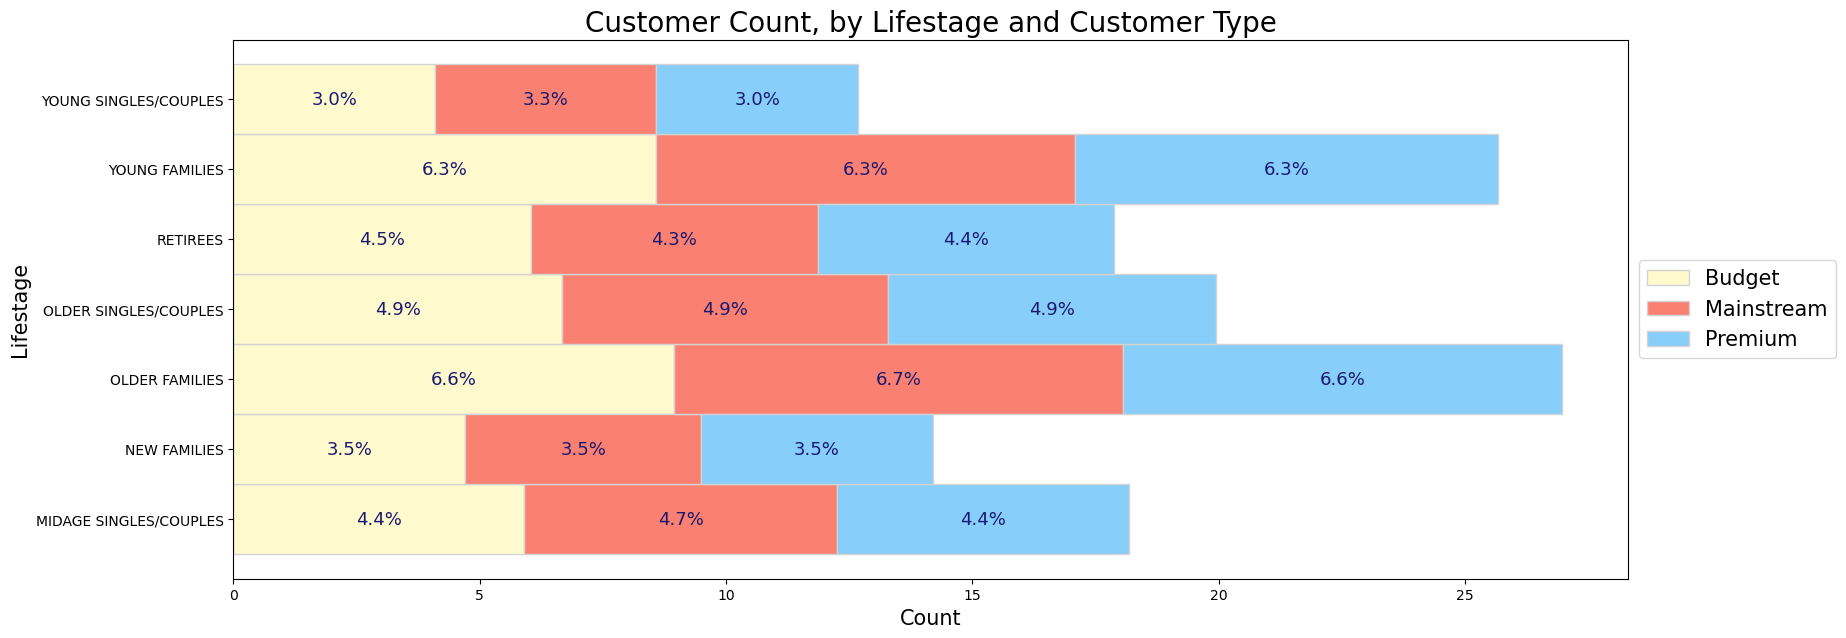

In [68]:
# Plot to show the average number of units per customer by LIFESTAGE and PREMIUM_CUSTOMER
# Values of each group
bars1 = avg_prod[avg_prod.index.get_level_values("PREMIUM_CUSTOMER") == "Budget"]["Av_Prod_Qty"]
bars2 = avg_prod[avg_prod.index.get_level_values("PREMIUM_CUSTOMER") == "Mainstream"]["Av_Prod_Qty"]
bars3 = avg_prod[avg_prod.index.get_level_values("PREMIUM_CUSTOMER") == "Premium"]["Av_Prod_Qty"]
 
bars1_text = (bars1 / sum(avg_prod["Av_Prod_Qty"])).apply("{:.1%}".format)
bars2_text = (bars2 / sum(avg_prod["Av_Prod_Qty"])).apply("{:.1%}".format)
bars3_text = (bars3 / sum(avg_prod["Av_Prod_Qty"])).apply("{:.1%}".format)
 
# Names of group and bar width
names = avg_prod.index.get_level_values("LIFESTAGE").unique()

# The position of the bars on the x-axis
r = np.arange(len(names))

plt.figure(figsize=(18,7)) 

colors = ['salmon', 'lemonchiffon', 'lightskyblue']
# Create yellow bars
budget_bar = plt.barh(r, bars1, color=colors[1], edgecolor="lightgrey", height=1, label="Budget")
# Create red bars (middle)
mains_bar = plt.barh(r, bars2, left=bars1, color=colors[0], edgecolor="lightgrey", height=1, label="Mainstream")
# Create blue bars (top)
prem_bar = plt.barh(r, bars3, left=bars1.append(bars2).groupby(["LIFESTAGE"]).sum(), color=colors[2], edgecolor="lightgrey", height=1, label="Premium")
    
for i in range(7):
    budget_width = budget_bar[i].get_width()
    budget_main_width = budget_width + mains_bar[i].get_width()
    plt.text(budget_width/2, i, bars1_text[i], va='center', ha='center', size=13, color='midnightblue')
    plt.text(budget_width + mains_bar[i].get_width()/2, i, bars2_text[i], va='center', ha='center', size=13, color='midnightblue')
    plt.text(budget_main_width + prem_bar[i].get_width()/2, i, bars3_text[i], va='center', ha='center', size=13, color='midnightblue')
    
# Custom X axis
plt.yticks(r, names)
plt.ylabel("Lifestage",fontsize=15)
plt.xlabel("Count",fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),fontsize=15)

plt.title("Customer Count, by Lifestage and Customer Type",fontsize=20)

# Show graphic
plt.show()

Older families and young families in general buy more chips per customer

#### d) Average price per unit by LIFESTAGE and PREMIUM_CUSTOMER

In [69]:
avg_prod['AVG_Prod_Price'] = (avg_prod["TOT_SALES"]/avg_prod["Prod_Qty"])
avg_prod

TOT_SALES  Count  Prod_Qty  \
LIFESTAGE              PREMIUM_CUSTOMER                               
MIDAGE SINGLES/COUPLES Budget             33345.70   1504      8883   
                       Mainstream         84734.25   3340     21213   
                       Premium            54443.85   2431     14400   
NEW FAMILIES           Budget             20607.45   1112      5241   
                       Mainstream         15979.70    849      4060   
                       Premium            10760.80    588      2769   
OLDER FAMILIES         Budget            156863.75   4675     41853   
                       Mainstream         96413.55   2831     25804   
                       Premium            75242.60   2274     20239   
OLDER SINGLES/COUPLES  Budget            127833.60   4929     32883   
                       Mainstream        124648.50   4930     32607   
                       Premium           123531.55   4750     31693   
RETIREES               Budget            105916.30   4454     26932   
                       Mainstream        145168.95   6479     37677   
                       Premium            91296.65   3872     23266   
YOUNG FAMILIES         Budget            129717.95   4017     34482   
                       Mainstream         86338.25   2728     23194   
                       Premium            78571.70   2433     20901   
YOUNG SINGLES/COUPLES  Budget             57122.10   3779     15500   
                       Mainstream        147582.20   8088     36225   
                       Premium            39052.30   2574     10575   

                                         Av_Prod_Qty  AVG_Prod_Price  
LIFESTAGE              PREMIUM_CUSTOMER                               
MIDAGE SINGLES/COUPLES Budget               5.906250        3.753878  
                       Mainstream           6.351198        3.994449  
                       Premium              5.923488        3.780823  
NEW FAMILIES           Budget               4.713129        3.931969  
                       Mainstream           4.782097        3.935887  
                       Premium              4.709184        3.886168  
OLDER FAMILIES         Budget               8.952513        3.747969  
                       Mainstream           9.114800        3.736380  
                       Premium              8.900176        3.717703  
OLDER SINGLES/COUPLES  Budget               6.671333        3.887529  
                       Mainstream           6.613996        3.822753  
                       Premium              6.672211        3.897755  
RETIREES               Budget               6.046700        3.932731  
                       Mainstream           5.815249        3.852986  
                       Premium              6.008781        3.924037  
YOUNG FAMILIES         Budget               8.584018        3.761903  
                       Mainstream           8.502199        3.722439  
                       Premium              8.590629        3.759232  
YOUNG SINGLES/COUPLES  Budget               4.101614        3.685297  
                       Mainstream           4.478858        4.074043  
                       Premium              4.108392        3.692889

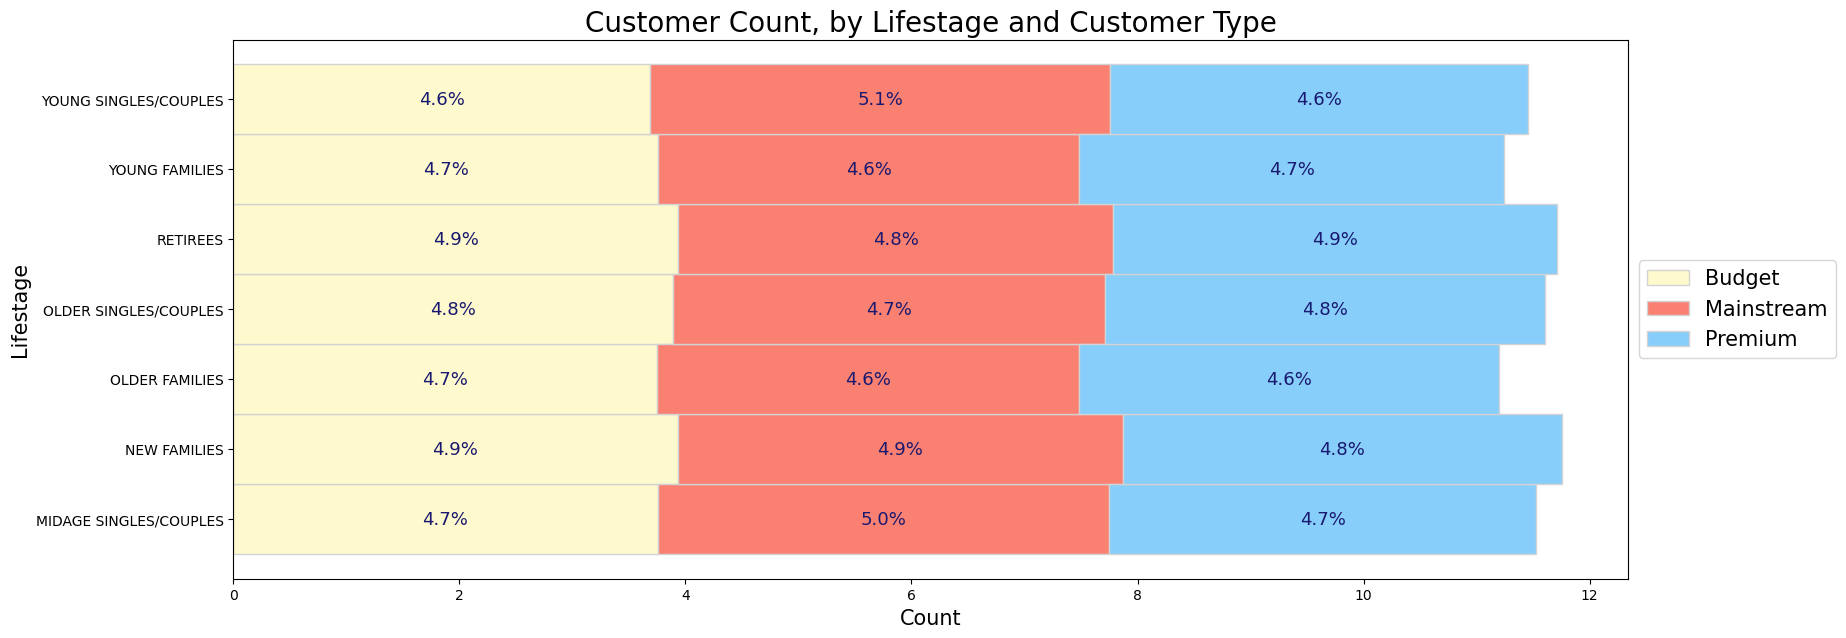

In [70]:
# Plot to show the average price per unit by LIFESTAGE and PREMIUM_CUSTOMER
# Values of each group
bars1 = avg_prod[avg_prod.index.get_level_values("PREMIUM_CUSTOMER") == "Budget"]["AVG_Prod_Price"]
bars2 = avg_prod[avg_prod.index.get_level_values("PREMIUM_CUSTOMER") == "Mainstream"]["AVG_Prod_Price"]
bars3 = avg_prod[avg_prod.index.get_level_values("PREMIUM_CUSTOMER") == "Premium"]["AVG_Prod_Price"]
 
bars1_text = (bars1 / sum(avg_prod["AVG_Prod_Price"])).apply("{:.1%}".format)
bars2_text = (bars2 / sum(avg_prod["AVG_Prod_Price"])).apply("{:.1%}".format)
bars3_text = (bars3 / sum(avg_prod["AVG_Prod_Price"])).apply("{:.1%}".format)
 
# Names of group and bar width
names = avg_prod.index.get_level_values("LIFESTAGE").unique()

# The position of the bars on the x-axis
r = np.arange(len(names))

plt.figure(figsize=(18,7)) 

colors = ['salmon', 'lemonchiffon', 'lightskyblue']
# Create yellow bars
budget_bar = plt.barh(r, bars1, color=colors[1], edgecolor="lightgrey", height=1, label="Budget")
# Create red bars (middle)
mains_bar = plt.barh(r, bars2, left=bars1, color=colors[0], edgecolor="lightgrey", height=1, label="Mainstream")
# Create blue bars (top)
prem_bar = plt.barh(r, bars3, left=bars1.append(bars2).groupby(["LIFESTAGE"]).sum(), color=colors[2], edgecolor="lightgrey", height=1, label="Premium")
    
for i in range(7):
    budget_width = budget_bar[i].get_width()
    budget_main_width = budget_width + mains_bar[i].get_width()
    plt.text(budget_width/2, i, bars1_text[i], va='center', ha='center', size=13, color='midnightblue')
    plt.text(budget_width + mains_bar[i].get_width()/2, i, bars2_text[i], va='center', ha='center', size=13, color='midnightblue')
    plt.text(budget_main_width + prem_bar[i].get_width()/2, i, bars3_text[i], va='center', ha='center', size=13, color='midnightblue')
    
# Custom X axis
plt.yticks(r, names)
plt.ylabel("Lifestage",fontsize=15)
plt.xlabel("Count",fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),fontsize=15)

plt.title("Customer Count, by Lifestage and Customer Type",fontsize=20)

# Show graphic
plt.show()

**Observation:**

- Mainstream midage and young singles and couples are more willing to pay more per packet of chips compared to their budget and premium counterparts. This may be due to premium shoppers being more likely to buy healthy snacks and when they buy chips, this is mainly for entertainment purposes rather than their own consumption.
- This is also supported by there being fewer premium midage and young singles and couples buying chips compared to their mainstream counterparts.


As the difference in average price per unit isn't large, I'm going to check if this difference is statistically different.

In [73]:
from scipy import stats
# Perform an independent t-test between mainstream vs premium and budget midage and young singles and couples
new_merge=avg_prod.reset_index()
mainstream = new_merge.loc[new_merge["PREMIUM_CUSTOMER"]=="Mainstream"]
others = new_merge.loc[(new_merge["PREMIUM_CUSTOMER"]=="Premium")|(new_merge["PREMIUM_CUSTOMER"]=="Budget")]
main_mid_young = mainstream["AVG_Prod_Price"][(new_merge["LIFESTAGE"]=="MIDAGE SINGLES/COUPLES")|(new_merge["LIFESTAGE"]=="YOUNG SINGLES/COUPLES")]
others_mid_young = others["AVG_Prod_Price"][(new_merge["LIFESTAGE"]=="MIDAGE SINGLES/COUPLES")|(new_merge["LIFESTAGE"]=="YOUNG SINGLES/COUPLES")]

# Homogeneity of variance test
stats.levene(main_mid_young,others_mid_young)

LeveneResult(statistic=0.00490158871698384, pvalue=0.9475450406225323)

p > 0.05 indicates that the variance of them are different.



In [74]:
# Independent T-test
stats.ttest_ind(main_mid_young,others_mid_young, equal_var=False)

Ttest_indResult(statistic=6.635796901874541, pvalue=0.031128004009301317)

The t-test results in a p-value of 0.03 (< 0.05) show the statistical significant (95% confidence), i.e. the unit price for mainstream, young and mid-age singles and couples are significantly higher than that of budget or premium, young and midage singles and couples

---

### V. Act

### 1. Finding Summary
#### a) Brands :
Top 3 best-selling brands:
- Kettle
- Smiths
- Doritos

#### b) Customers:
Top 3 Lifestage:
- Retirees 20.38%
- Older Singles/Couples 20.11%
- Young Singles/Couples 19.88%

Customer Type:
- Mainstream 40.26%
- Budget 33.69%
- Premium 26.05%

Total Sales - Top 3 sales driver segments :
- Budget - Older Families (higher quantity per customer in older families)
- Mainstream - Young Singles/Couples (higher customer counts and higher average purchase price)
- Mainstream - Retirees (higher customer counts)

Other facts :
- Customer counts : There are more Mainstream - young singles/couples and Mainstream - retirees who buy chips.
- Average purchase quantity : Older families and young families in general buy more chips per customer.
- Average purchase price : Mainstream midage and young singles/couples are more willing to pay more per packet of chips compared to their budget and premium counterparts (statistical significant).
### 2. Target segments:
#### a) Budget - Older Families:
- Promotion like 'Buy Two Get One Free': Because of their higher average purchase quantity, promotions like this can boost sales.
#### b) Mainstream - Young Singles/Couples:
- Target advertisements: This segment has the majority of customers and thus should be the focus of our marketing. Targeted advertising around areas such as colleges and universities is probably a good strategy.
- Change the display area: Placing some chips next to other young people’s daily necessities will also attract their attention, thereby increasing sales.
- Promotion and repackaging on popular brands and sizes: In addition to Kettle and 175g chips, which is popular among all segments, Doritos and Pringles are popular in this segement. Therefore, we can increase promotion of these chips as well as advice their productors and Suppliers to repackage their products. For instance, they can use more vibrant colors and fonts to gain love from young people. Meanwhile, similar strategy is also useful for 150g and 134g chips.
- Strategies metioned above can be used in combination to maximize the effect.
#### c) Mainstream - Retirees:
- Target advertisements: Similar to last segment, we can put targeted advertising because of the large number of customers.
- Limited time sales promotions during daytime: Retired customers are more inclined to shop during daytime, so we can choose products that are popular in this segment for promotion when these customers visit.